In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import scvelo as scv
import scipy as sp
from scipy import stats
from scipy import special
from scipy.stats import poisson,norm
from scipy.special import j_roots
from scipy.special import beta as beta_fun 
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns

import test.utils as test

In [2]:
scv.set_figure_params(dpi=100, color_map = 'viridis_r')
scv.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.7.2 anndata==0.8.0 umap==0.4.1 numpy==1.19.5 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9


In [3]:
# # read UMI counts and params for c57 and cast viariants
# UMI_c57 = pd.read_csv('data_arme/F1_ref/umiSplit_c57.qc.csv', index_col=0)
# UMI_cast = pd.read_csv('data_arme/F1_ref/umiSplit_cast.qc.csv', index_col=0)

# UMI = UMI_c57 + UMI_cast

# # transpose to ge n_cells x n_genes shape
# UMI_c57_T = UMI_c57.transpose(copy=True)
# UMI_cast_T = UMI_cast.transpose(copy=True)
# UMI_T = UMI.transpose(copy=True)

# adata = ad.AnnData(UMI_T)
# adata.layers['spliced'] = UMI_c57_T
# adata.layers['unspliced'] = UMI_cast_T

# gtf = pd.read_csv("data/Mus_musculus.GRCm38.102.chr.gtf", sep='\t', skiprows=5, header=None)
# gtf.columns = ['chr', 'database', 'type', 'start', 'end', '.', 'strand', '.', 'other']
# gtf = gtf[gtf['type'] == "gene"]
# gtf = gtf.reset_index()

# dic_gene_names = {}
# index = 0
# for line in gtf['other'].tolist():
#     line = line.split(';')
#     dic_gene_names[line[0][9:-1]]= [gtf['chr'][index], line[2][12:-1]]
#     index += 1
    
# adata.var['gene_name'] = [dic_gene_names[x][1] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]
# adata.var['chromosome'] = [dic_gene_names[x][0] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]


# label = []
# for chrom in adata.var['chromosome']:
#     if chrom == "X":
#         label.append('X')
#     elif chrom == "Y":
#         label.append('Y')
#     else:
#         label.append('autosome')
# adata.var['autosomes'] = label

# label = []
# for chrom in adata.var['chromosome']:
#     if chrom == "MT":
#         label.append('MT')
#     else:
#         label.append('nuclear')
# adata.var['nuclear'] = label

# label = []
# for genes in adata.var['gene_name']:
#     if genes[:2]=='Rp':
#         label.append('Ribosomal protein')
#     else:
#         label.append('other protein')
# adata.var['Ribosomal_prot'] = label

# test.remove_na(adata)
# test.find_ratios_sum(adata)
# test.find_ratios_std(adata)
# test.get_p_values(adata)


# sc.pp.neighbors(adata, n_neighbors=8, n_pcs=31)
# sc.tl.umap(adata)
# sc.tl.leiden(adata)
# adata.obs['clusters'] = adata.obs['leiden'].copy()
               

In [4]:
# adata.var['chromosome'] = adata.var['chromosome'].astype('str') 
# adata.var['chromosome']

In [5]:
# adata.write('data/test_classifier.h5ad')

In [6]:
adata = sc.read_h5ad('data/test_classifier.h5ad')

In [7]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,360.708822,0.471101,0.528899,0.157535,0.157535,0.001223
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,34.500000,0.460938,0.539062,0.498447,0.498447,1.000000
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,331.394683,0.514084,0.485916,0.151797,0.151797,0.089846
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,324.052256,0.524850,0.475150,0.144606,0.144606,0.020103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='ratio_allele_1', ylabel='Density'>

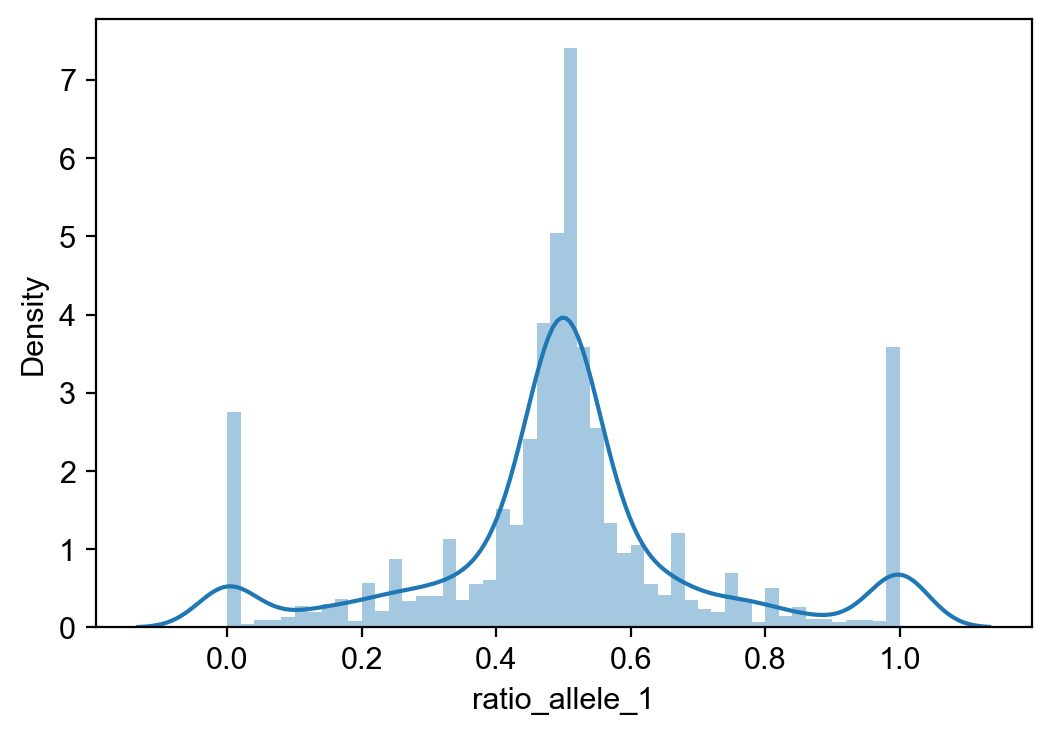

In [8]:
sns.distplot(adata.var.ratio_allele_1)

<AxesSubplot:xlabel='ratio_allele_2', ylabel='Density'>

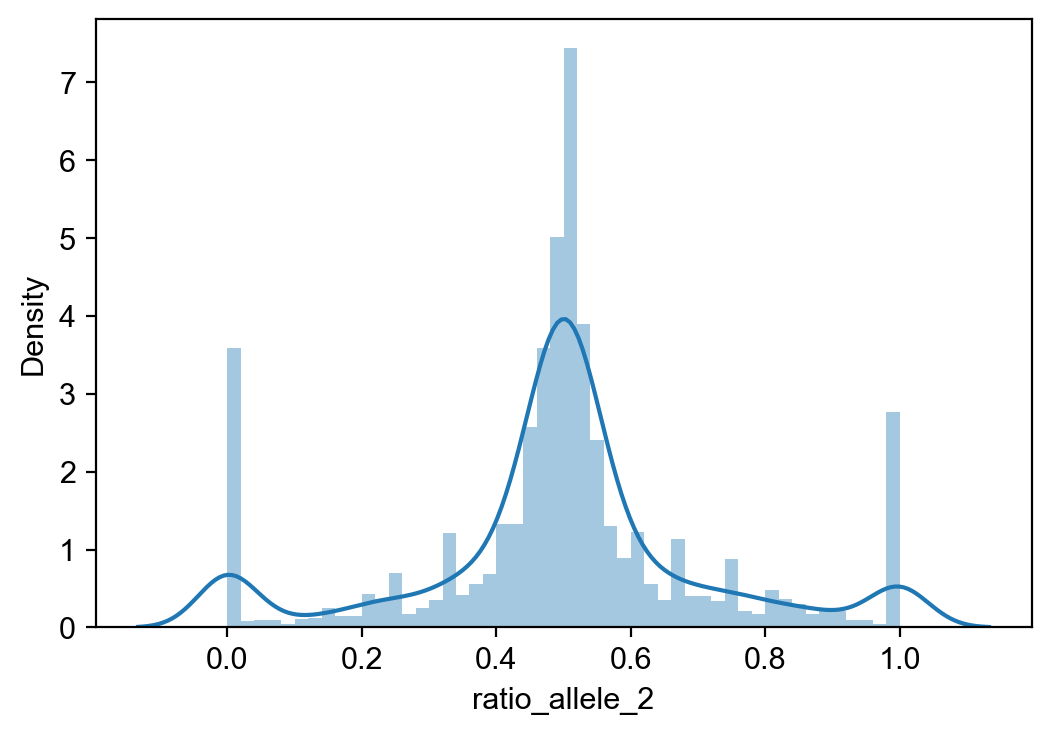

In [9]:
sns.distplot(adata.var.ratio_allele_2)

<AxesSubplot:xlabel='p_value', ylabel='Density'>

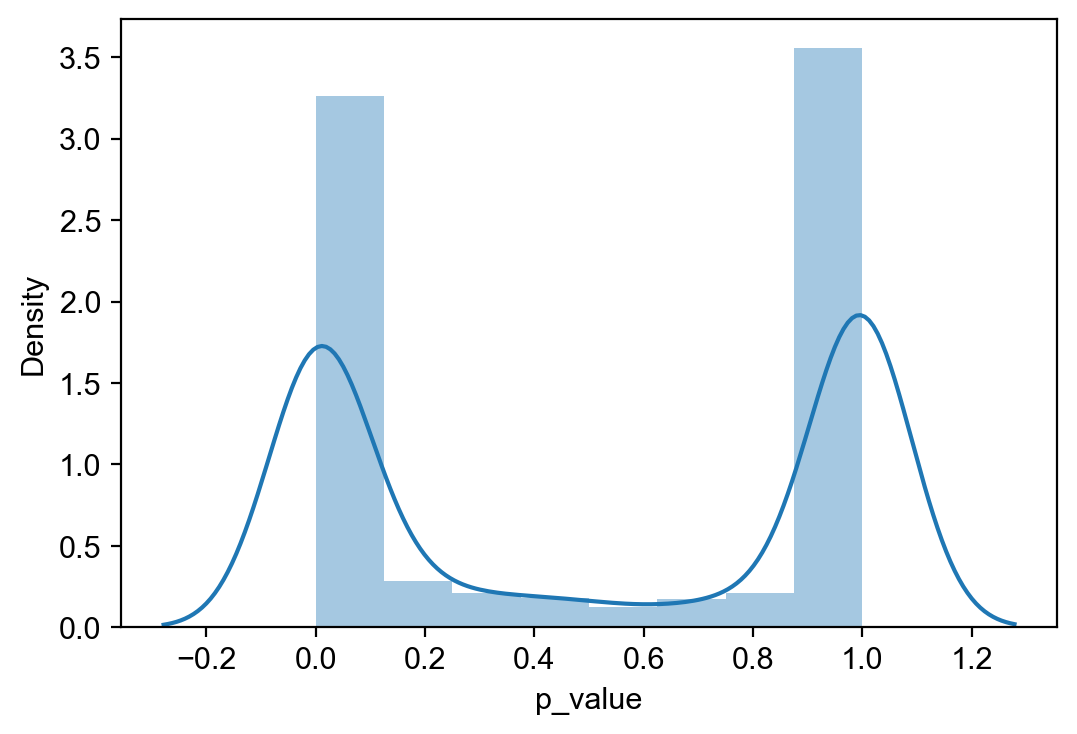

In [10]:
sns.distplot(adata.var.p_value)

In [11]:
# group_1 is biallelic and group_2 is remaining, based on P_value
group_1 = adata.var[adata.var.p_value >= 0.005]

group_2  = adata.var[adata.var.p_value < 0.005]



In [12]:
PoO_1 = group_2[(group_2.ratio_allele_1 <= 0.1) | (group_2.ratio_allele_1 >= 0.9)].index
PoO_2 = group_2[(group_2.ratio_allele_2 <= 0.1) | (group_2.ratio_allele_2 >= 0.9)].index
PoO = list(set(PoO_1.union(PoO_2)))
len(PoO)

48

In [13]:
group_2 = group_2.drop(PoO)

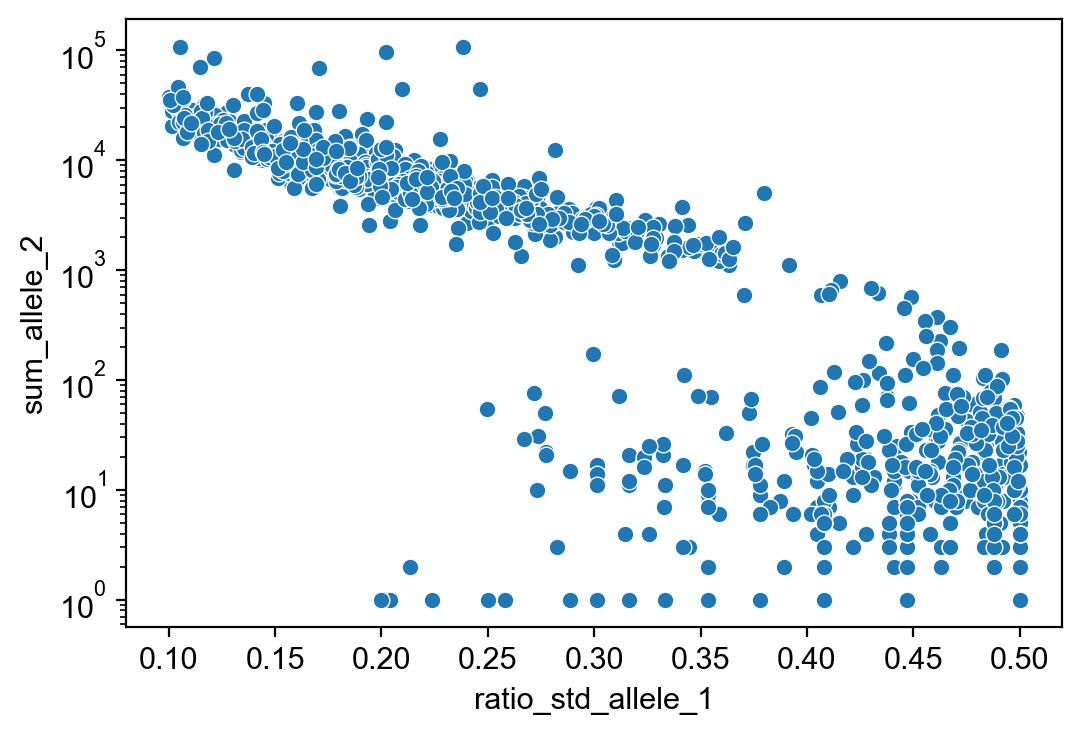

In [56]:
sns.scatterplot(data=group_1, x="ratio_std_allele_1", y="sum_allele_2")
plt.yscale('log')

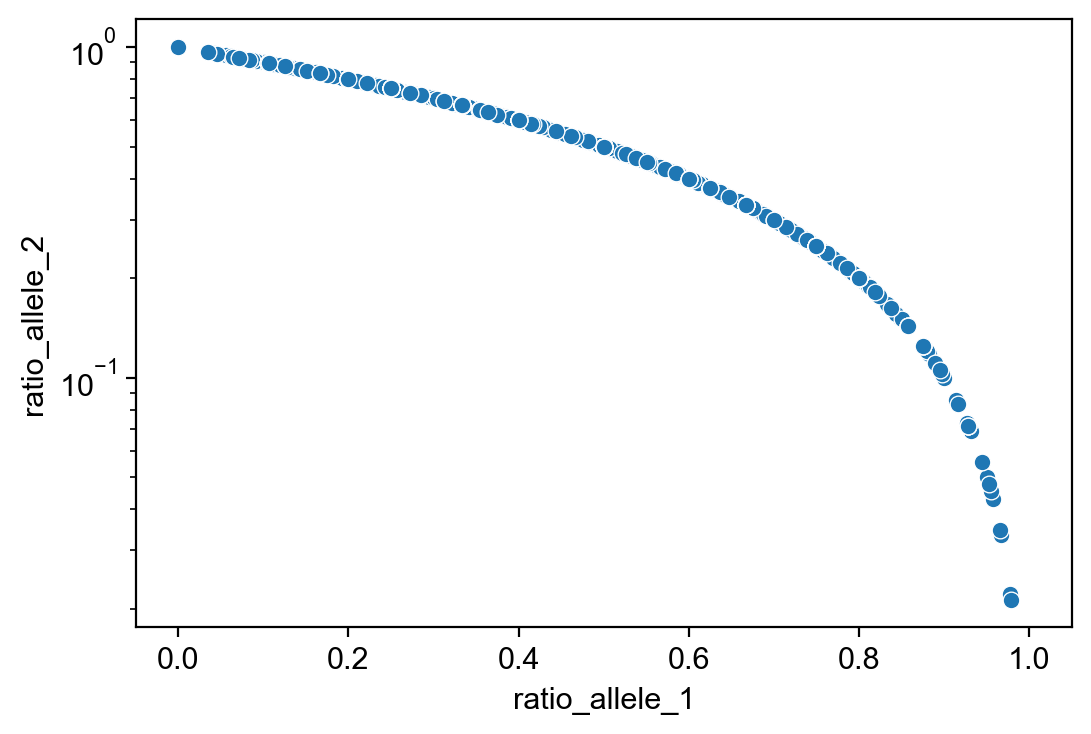

In [15]:
sns.scatterplot(data=group_1, x="ratio_allele_1", y="ratio_allele_2")
plt.yscale('log')

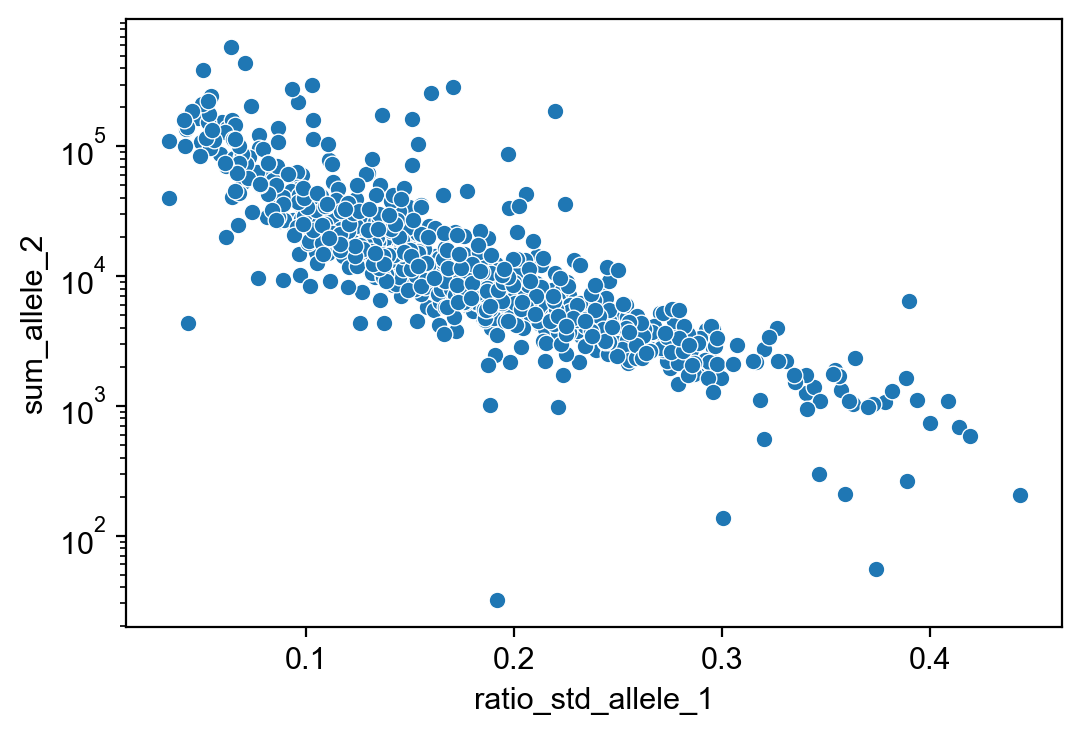

In [16]:
sns.scatterplot(data=group_2, x="ratio_std_allele_1", y="sum_allele_2")
plt.yscale('log')

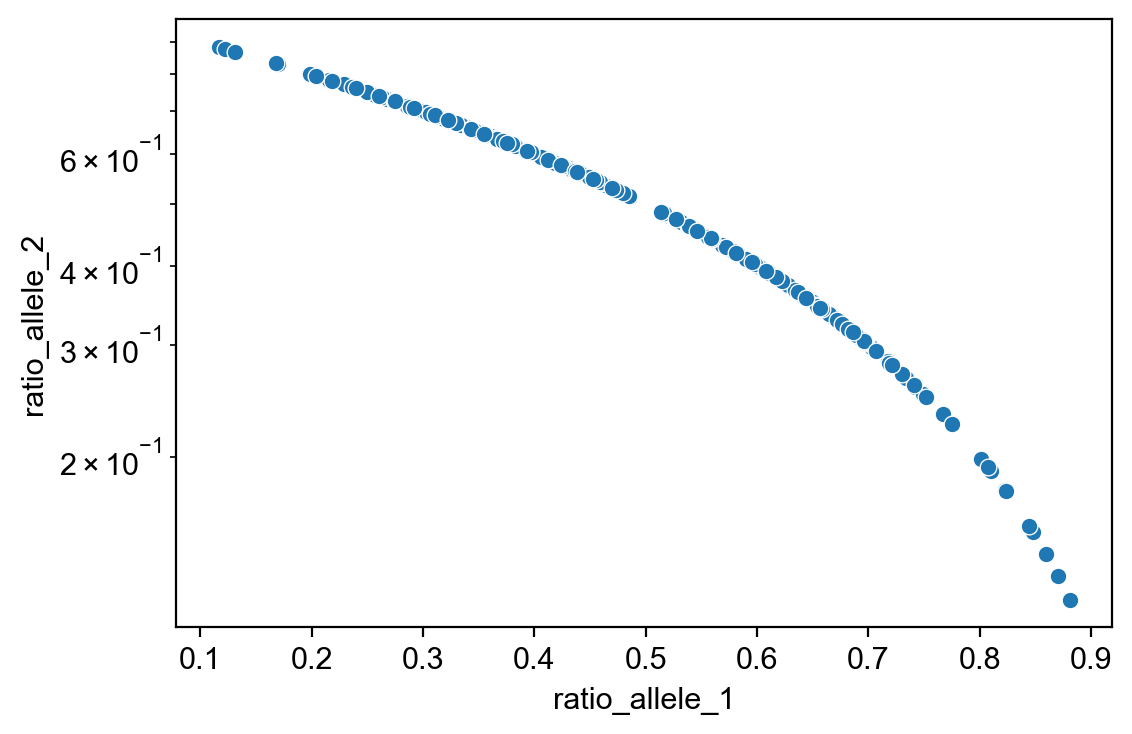

In [17]:
sns.scatterplot(data=group_2, x="ratio_allele_1", y="ratio_allele_2")
plt.yscale('log')

In [18]:
group_1_excluded = group_1[(group_1['ratio_std_allele_1']<0.1) | (group_1['ratio_std_allele_1']>0.5)]

In [19]:
group_1_excluded

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ENSMUSG00000000303,Cdh1,8,autosome,nuclear,other protein,1.0,3.0,0.250000,0.750000,1.000000,2.000000,0.333333,0.666667,0.577350,0.577350,1.000000
ENSMUSG00000000489,Pdgfb,15,autosome,nuclear,other protein,6.0,5.0,0.545455,0.454545,5.000000,4.000000,0.555556,0.444444,0.527046,0.527046,1.000000
ENSMUSG00000000563,Atp5pb,3,autosome,nuclear,other protein,28060.0,28920.0,0.492453,0.507547,333.311309,348.688691,0.488726,0.511274,0.083345,0.083345,0.012112
ENSMUSG00000001506,Col1a1,11,autosome,nuclear,other protein,175956.0,190576.0,0.480056,0.519944,323.787073,358.212927,0.474761,0.525239,0.074537,0.074537,0.010169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
group_1 = group_1.drop(group_1_excluded.index)

In [21]:
group_2 = pd.concat([group_2, group_1_excluded])

In [22]:
group_1_index  = group_1.index
group_2_index  = group_2.index

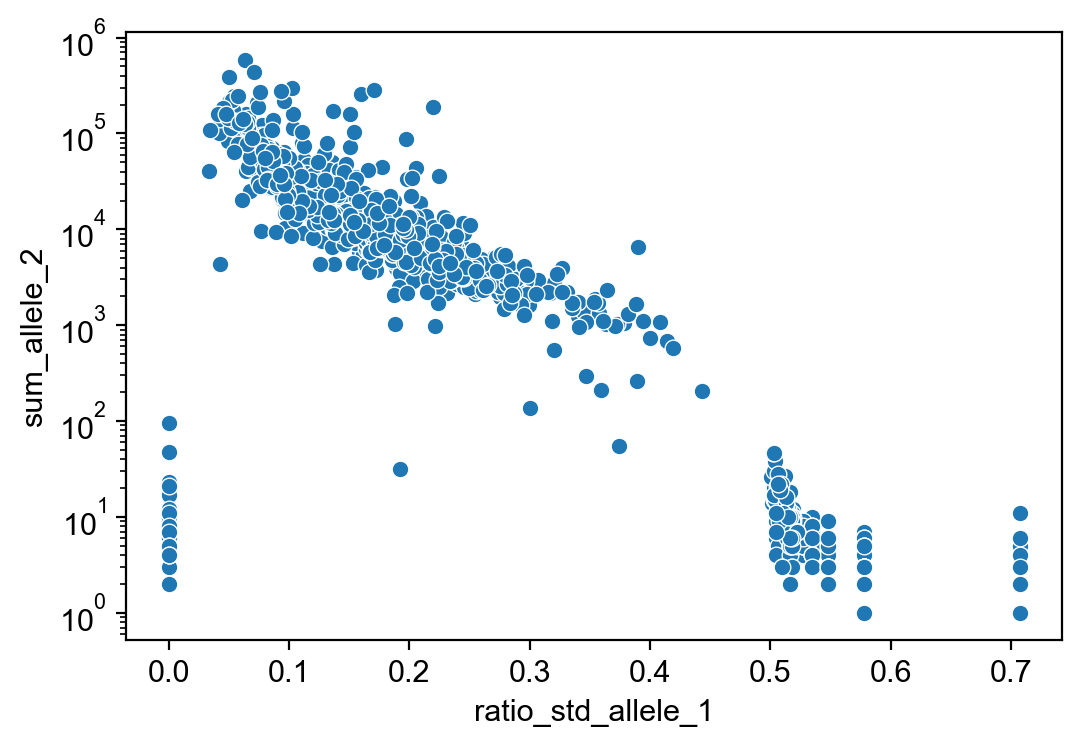

In [23]:
sns.scatterplot(data=group_2, x="ratio_std_allele_1", y="sum_allele_2")
plt.yscale('log')

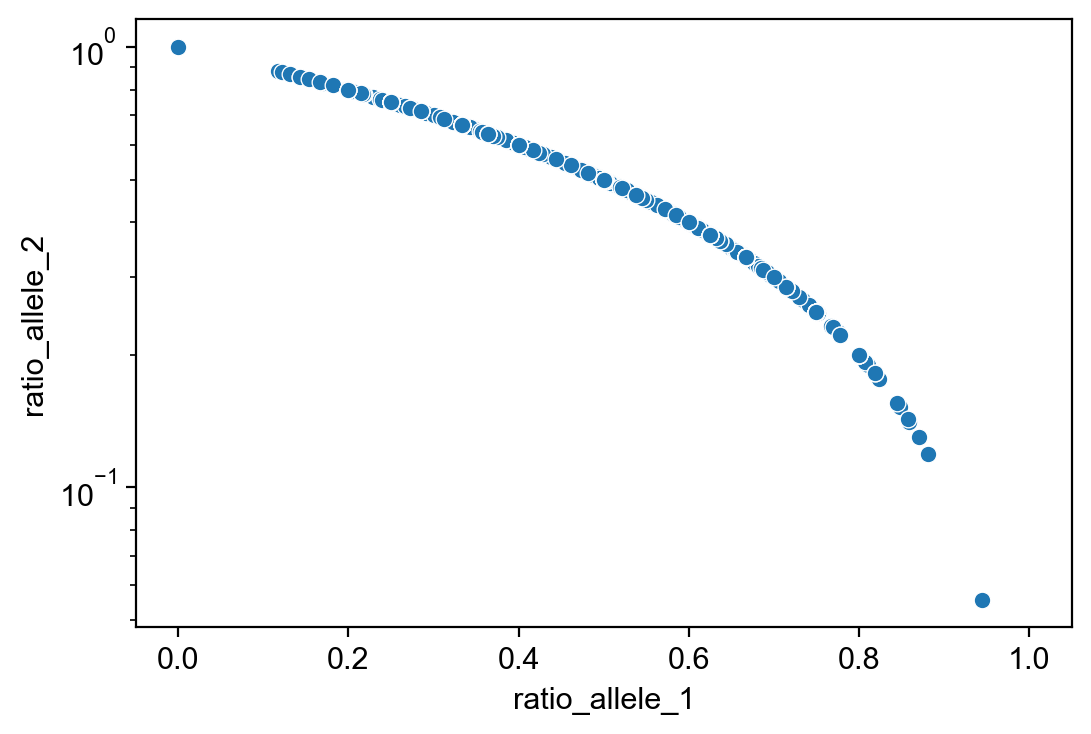

In [24]:
sns.scatterplot(data=group_2, x="ratio_allele_1", y="ratio_allele_2")
plt.yscale('log')

In [25]:
group_2_index = [x for x in group_2_index if x not in PoO]

In [26]:
len(group_1_index)

1260

In [27]:
len(group_2_index)

1826

In [28]:
len(PoO)

48

In [29]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,360.708822,0.471101,0.528899,0.157535,0.157535,0.001223
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,34.500000,0.460938,0.539062,0.498447,0.498447,1.000000
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,331.394683,0.514084,0.485916,0.151797,0.151797,0.089846
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,324.052256,0.524850,0.475150,0.144606,0.144606,0.020103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


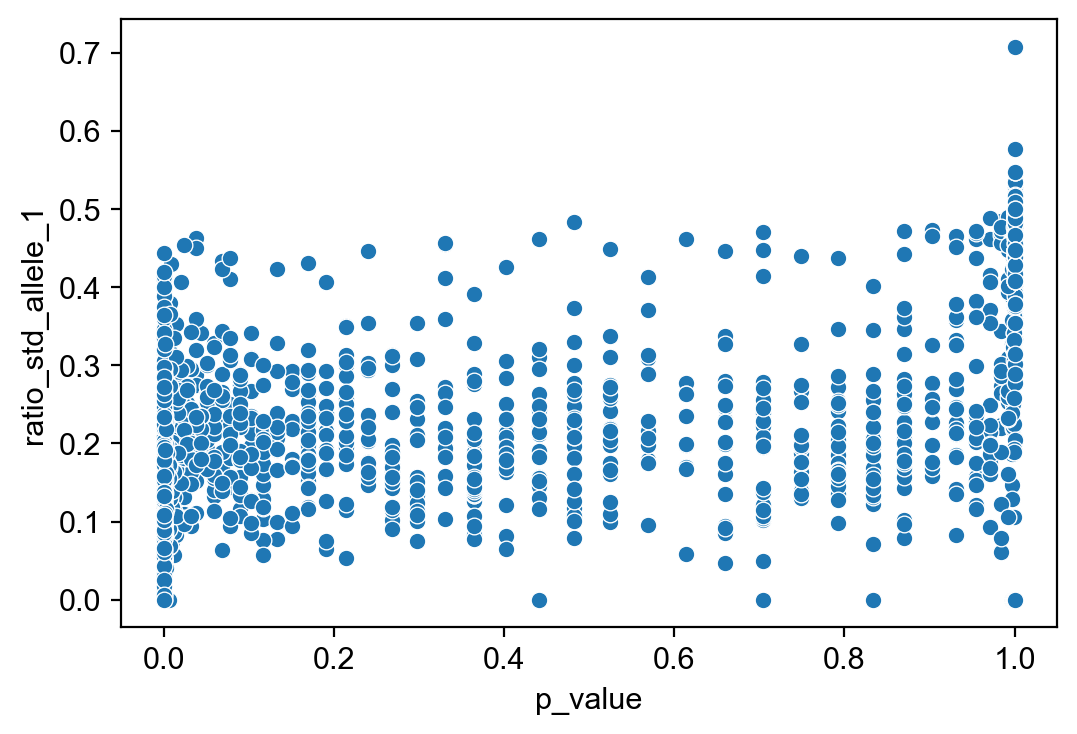

In [30]:
test.sns_scatter(x="p_value", y="ratio_std_allele_1", data=adata.var)


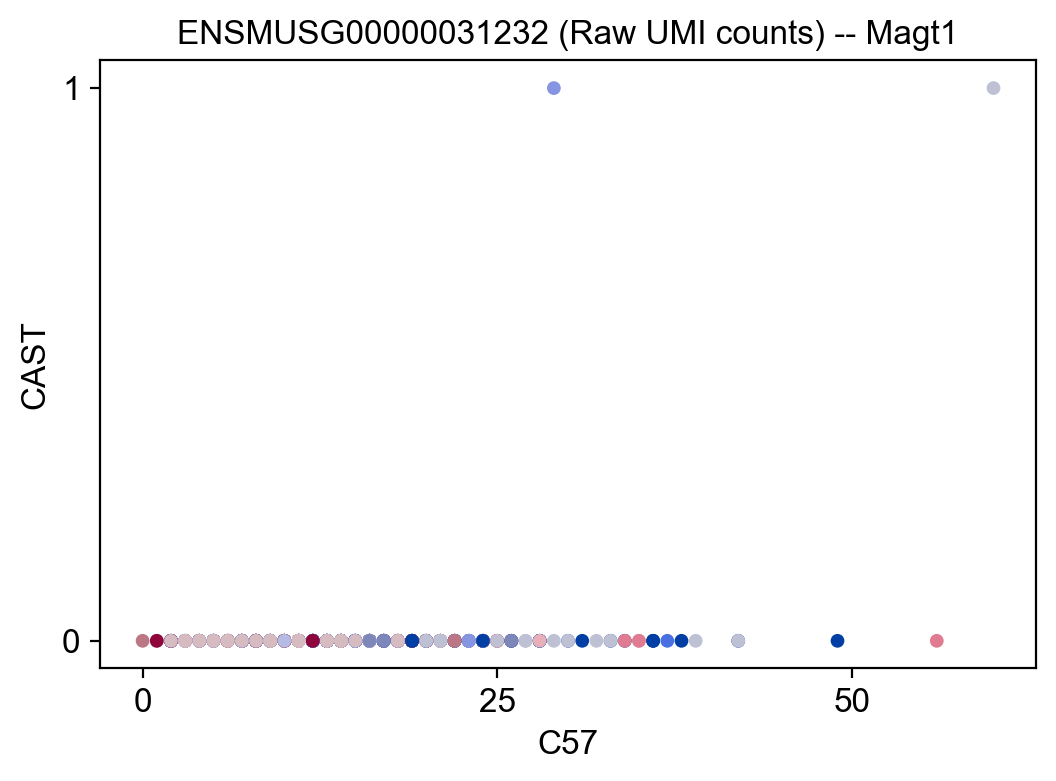

In [31]:
# randomly plotting a gene from PoO group

import random
x = PoO[random.randint(0,len(PoO) - 1)]

scv.pl.scatter(adata, x, color=['clusters'], xlabel='C57', ylabel='CAST', 
               title=f"{x} (Raw UMI counts) -- {(adata.var.loc[x]['gene_name'])}")


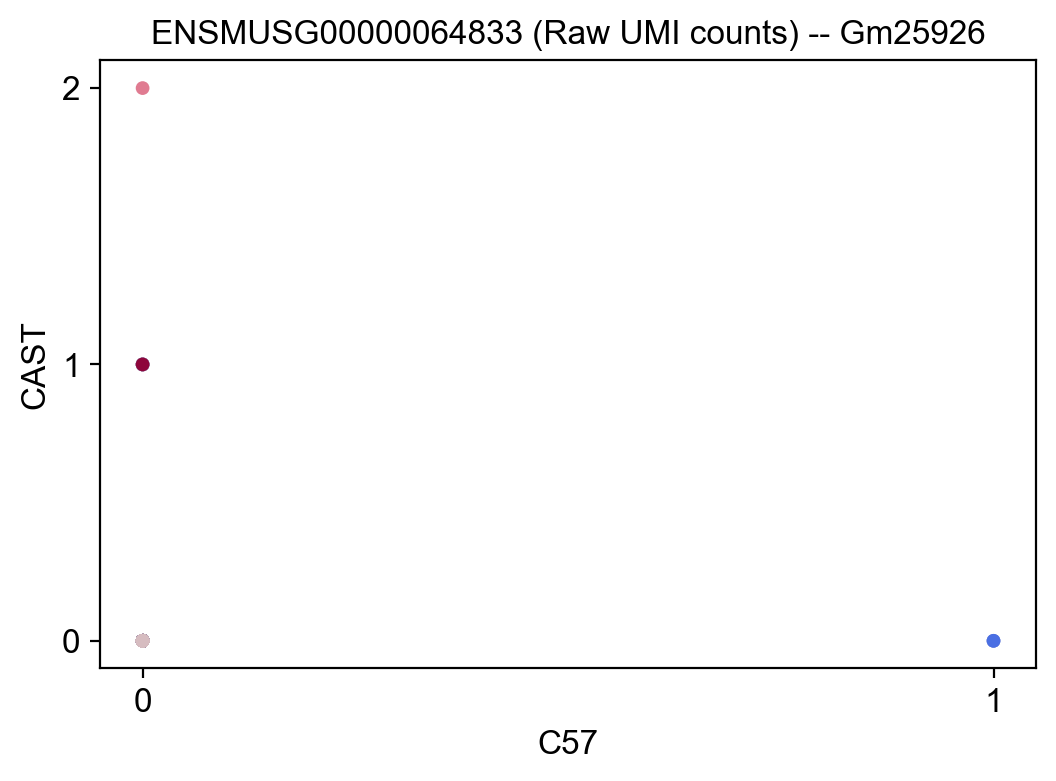

In [32]:
# randomly plotting a gene from bi-allelic group

import random
x = group_1_index[random.randint(0,len(group_1_index) - 1)]

scv.pl.scatter(adata, x, color=['clusters'], xlabel='C57', ylabel='CAST', 
               title=f"{x} (Raw UMI counts) -- {(adata.var.loc[x]['gene_name'])}")

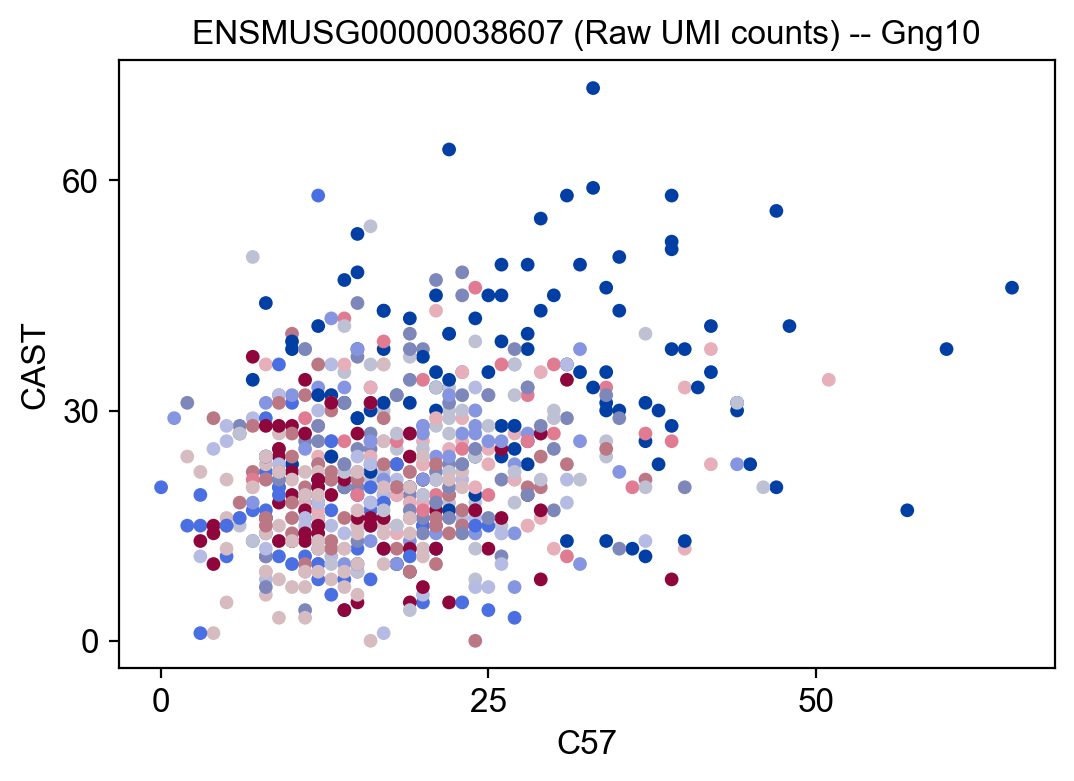

In [33]:

import random
x = group_2_index[random.randint(0,len(group_2_index) - 1)]

scv.pl.scatter(adata, x, color=['clusters'], xlabel='C57', ylabel='CAST', 
               title=f"{x} (Raw UMI counts) -- {(adata.var.loc[x]['gene_name'])}")

In [34]:
# class 0 - bi-allelic
# class 1 - Parent of Orign
# class 2 - other genes 

label = []
for x in adata.var.index:
    if x in group_1_index:
        label.append(0)
    else:
        if x in PoO:
            label.append(1)
        else:
            label.append(2)
adata.var['fit_class'] = label

In [35]:
### GEnerating shuffled training and test data for ml 

In [36]:
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value,fit_class
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,360.708822,0.471101,0.528899,0.157535,0.157535,0.001223,2
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,34.500000,0.460938,0.539062,0.498447,0.498447,1.000000,0
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,331.394683,0.514084,0.485916,0.151797,0.151797,0.089846,0
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,324.052256,0.524850,0.475150,0.144606,0.144606,0.020103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2


In [37]:
adata.layers['unspliced'].shape

(682, 3134)

In [38]:
allele_1 = pd.DataFrame(adata.layers['spliced'], columns=adata.var.index)
allele_2 = pd.DataFrame(adata.layers['unspliced'], columns=adata.var.index)

In [39]:
allele_1_T = allele_1.transpose(copy=True)
allele_2_T = allele_2.transpose(copy=True)

In [40]:
# differentiating allele 1 and allele 2 UMI counts
allele_T = (allele_1_T - allele_2_T) / (allele_1_T + allele_2_T)

In [41]:
allele_T['fit_class'] = adata.var['fit_class']

In [42]:
allele_T

,0,1,2,3,4,5,6,7,8,9,...,673,674,675,676,677,678,679,680,681,fit_class
ENSMUSG00000000001,0.428571,-0.500000,-0.371429,-0.133333,0.142857,-0.260870,-0.174603,-0.478261,-0.052632,-0.333333,...,-0.428571,-0.066667,-0.090909,0.230769,-0.04,-0.100,0.142857,0.125000,0.166667,2
ENSMUSG00000000049,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
ENSMUSG00000000088,0.176471,0.571429,0.304348,0.333333,-0.200000,0.588235,0.296296,-0.280000,0.313433,-0.448276,...,0.000000,-1.000000,-0.200000,0.000000,0.00,0.000,-0.428571,-1.000000,0.333333,0
ENSMUSG00000000120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000000184,-0.284553,0.888889,-0.243902,0.082803,0.368421,-0.418919,0.576923,0.250000,-0.393939,-0.100000,...,0.020408,0.317073,0.162791,-0.081081,0.10,0.075,0.067797,-0.333333,-0.241379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000103811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000112500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000114922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [43]:
### Hand pick test set incuding all distribution of classes
### Might need to make this random later

In [44]:
test_set_1=allele_T[allele_T['fit_class']==0].head(15).index
test_set_1

Index(['ENSMUSG00000000049', 'ENSMUSG00000000088', 'ENSMUSG00000000184',
       'ENSMUSG00000000346', 'ENSMUSG00000000378', 'ENSMUSG00000000673',
       'ENSMUSG00000000693', 'ENSMUSG00000000732', 'ENSMUSG00000000743',
       'ENSMUSG00000000792', 'ENSMUSG00000000805', 'ENSMUSG00000000826',
       'ENSMUSG00000000827', 'ENSMUSG00000000902', 'ENSMUSG00000000903'],
      dtype='object')

In [45]:
test_set_2=allele_T[allele_T['fit_class']==1].head(10).index
test_set_2

Index(['ENSMUSG00000001131', 'ENSMUSG00000001924', 'ENSMUSG00000001964',
       'ENSMUSG00000002010', 'ENSMUSG00000002015', 'ENSMUSG00000008682',
       'ENSMUSG00000015289', 'ENSMUSG00000016382', 'ENSMUSG00000016534',
       'ENSMUSG00000025151'],
      dtype='object')

In [46]:
test_set_3=allele_T[allele_T['fit_class']==2].head(15).index
test_set_3

Index(['ENSMUSG00000000001', 'ENSMUSG00000000120', 'ENSMUSG00000000295',
       'ENSMUSG00000000303', 'ENSMUSG00000000326', 'ENSMUSG00000000339',
       'ENSMUSG00000000489', 'ENSMUSG00000000563', 'ENSMUSG00000000740',
       'ENSMUSG00000000753', 'ENSMUSG00000000957', 'ENSMUSG00000000959',
       'ENSMUSG00000001025', 'ENSMUSG00000001056', 'ENSMUSG00000001098'],
      dtype='object')

In [47]:
test_set_in=test_set_1.union(test_set_2)
test_set = list(set(test_set_in.union(test_set_3)))
test_set_suffled = random.sample(test_set, len(test_set))

In [48]:
test_set_suffled

['ENSMUSG00000000792',
 'ENSMUSG00000000959',
 'ENSMUSG00000000339',
 'ENSMUSG00000002010',
 'ENSMUSG00000001056',
 'ENSMUSG00000000184',
 'ENSMUSG00000000903',
 'ENSMUSG00000000743',
 'ENSMUSG00000016534',
 'ENSMUSG00000015289',
 'ENSMUSG00000000753',
 'ENSMUSG00000000378',
 'ENSMUSG00000000563',
 'ENSMUSG00000000001',
 'ENSMUSG00000000957',
 'ENSMUSG00000000120',
 'ENSMUSG00000000902',
 'ENSMUSG00000000303',
 'ENSMUSG00000000295',
 'ENSMUSG00000000827',
 'ENSMUSG00000000346',
 'ENSMUSG00000000732',
 'ENSMUSG00000000088',
 'ENSMUSG00000008682',
 'ENSMUSG00000016382',
 'ENSMUSG00000001131',
 'ENSMUSG00000001098',
 'ENSMUSG00000000826',
 'ENSMUSG00000001025',
 'ENSMUSG00000001924',
 'ENSMUSG00000000673',
 'ENSMUSG00000000740',
 'ENSMUSG00000000805',
 'ENSMUSG00000000693',
 'ENSMUSG00000001964',
 'ENSMUSG00000025151',
 'ENSMUSG00000000326',
 'ENSMUSG00000000489',
 'ENSMUSG00000000049',
 'ENSMUSG00000002015']

In [49]:
test_set_csv = allele_T.loc[test_set_suffled]

In [50]:
test_set_csv.to_csv("data/classifier/test_set_5.csv", sep=";")

In [51]:
allele_T

,0,1,2,3,4,5,6,7,8,9,...,673,674,675,676,677,678,679,680,681,fit_class
ENSMUSG00000000001,0.428571,-0.500000,-0.371429,-0.133333,0.142857,-0.260870,-0.174603,-0.478261,-0.052632,-0.333333,...,-0.428571,-0.066667,-0.090909,0.230769,-0.04,-0.100,0.142857,0.125000,0.166667,2
ENSMUSG00000000049,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
ENSMUSG00000000088,0.176471,0.571429,0.304348,0.333333,-0.200000,0.588235,0.296296,-0.280000,0.313433,-0.448276,...,0.000000,-1.000000,-0.200000,0.000000,0.00,0.000,-0.428571,-1.000000,0.333333,0
ENSMUSG00000000120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000000184,-0.284553,0.888889,-0.243902,0.082803,0.368421,-0.418919,0.576923,0.250000,-0.393939,-0.100000,...,0.020408,0.317073,0.162791,-0.081081,0.10,0.075,0.067797,-0.333333,-0.241379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000103811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000112500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
ENSMUSG00000114922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [52]:
train_set = [x for x in list(allele_T.index) if x not in test_set_suffled]
len(train_set)

3094

In [53]:
train_set_suffled = random.sample(train_set, len(train_set))
train_set_suffled

['ENSMUSG00000033021',
 'ENSMUSG00000020332',
 'ENSMUSG00000062580',
 'ENSMUSG00000063802',
 'ENSMUSG00000062997',
 'ENSMUSG00000046275',
 'ENSMUSG00000089617',
 'ENSMUSG00000037411',
 'ENSMUSG00000015733',
 'ENSMUSG00000038462',
 'ENSMUSG00000040990',
 'ENSMUSG00000065521',
 'ENSMUSG00000067713',
 'ENSMUSG00000055968',
 'ENSMUSG00000027879',
 'ENSMUSG00000029840',
 'ENSMUSG00000091530',
 'ENSMUSG00000108976',
 'ENSMUSG00000002102',
 'ENSMUSG00000023046',
 'ENSMUSG00000023336',
 'ENSMUSG00000023852',
 'ENSMUSG00000040703',
 'ENSMUSG00000077649',
 'ENSMUSG00000046330',
 'ENSMUSG00000024953',
 'ENSMUSG00000096956',
 'ENSMUSG00000028882',
 'ENSMUSG00000027656',
 'ENSMUSG00000022462',
 'ENSMUSG00000113217',
 'ENSMUSG00000023057',
 'ENSMUSG00000028907',
 'ENSMUSG00000045813',
 'ENSMUSG00000113789',
 'ENSMUSG00000019659',
 'ENSMUSG00000036513',
 'ENSMUSG00000064225',
 'ENSMUSG00000031835',
 'ENSMUSG00000020232',
 'ENSMUSG00000109141',
 'ENSMUSG00000030536',
 'ENSMUSG00000025465',
 'ENSMUSG00

In [54]:
train_set_csv = allele_T.loc[train_set_suffled]

In [55]:
train_set_csv.to_csv("data/classifier/train_set_5.csv", sep=";")